# [과제 3] 로지스틱 회귀분석
 - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
 - 성능지표를 계산하고 이에 대해 해석해주세요.
 - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
 - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [3]:
import numpy as np
import pandas as pd

import os
for dirname,_, filenames in os.walk('/kaggle/input'):
    for filename in filenames :
        print(os.path.join(dirname,filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Conclusion :**
- We can see that columns 'Time' and 'Amount' have large values compared to other columns
- Hence there will be a need to normalize them

<AxesSubplot:xlabel='Class', ylabel='count'>

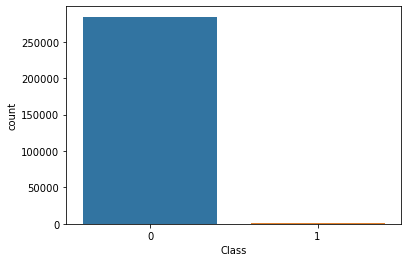

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Class')

Text(0.5, 1.0, 'Distribution of Transaction Time')

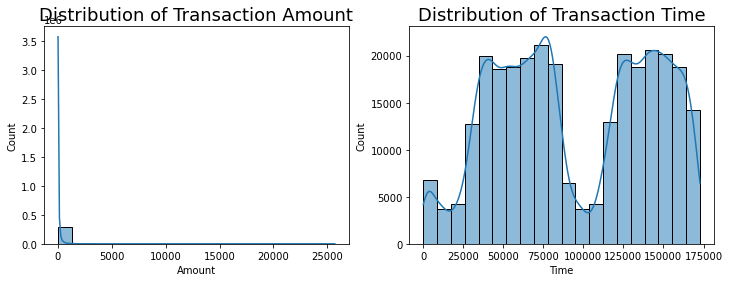

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(data=df, x='Amount', ax=ax[0], kde=True, bins=20)
ax[0].set_title('Distribution of Transaction Amount', fontsize=18)

sns.histplot(data=df, x='Time', ax=ax[1], kde=True, bins=20)
ax[1].set_title('Distribution of Transaction Time', fontsize=18)

**conclusion :**
- Very *skewed distribution* of the output label
- This can cause *imbalanced dataset* problem

### Normallization

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rbs_scaler = RobustScaler() # less prone to outliers

df['amount_scaled'] = rbs_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = rbs_scaler.fit_transform(df['Time'].values.reshape(-1,1))


df.drop(columns=['Amount','Time'], inplace=True)

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Random Undersampling

In [25]:
# Suffle Data before sampling

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

new_df = pd.concat([fraud_df, non_fraud_df])
new_df = new_df.sample(frac=1)

In [26]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
82706,0.816955,-0.623000,1.021199,1.551632,-1.213032,-0.219104,-0.388090,0.078680,0.848944,-0.134025,...,0.353463,-0.234982,0.395855,0.405410,-0.258653,0.027031,0.065283,0,2.294557,-0.295786
75511,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,2.080905,-0.335930
235644,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,-2.530507,-5.175660,...,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,1,1.406833,0.749386
251866,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1,-0.252917,0.832282
96994,0.286302,1.399345,-1.682503,3.864377,-1.185373,-0.341732,-2.539380,0.768378,-1.547882,-2.659718,...,-0.243678,-0.194079,-0.172201,0.742237,0.127790,0.569731,0.291206,1,-0.202194,-0.219164


<AxesSubplot:title={'center':'Distribution After Random UnderSampling'}, xlabel='Class', ylabel='count'>

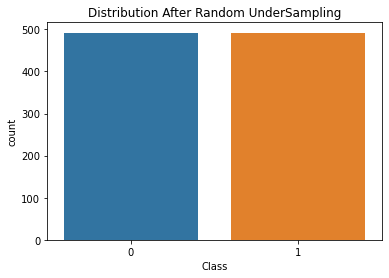

In [27]:
plt.title('Distribution After Random UnderSampling')
sns.countplot(data=new_df, x='Class')

Text(0.5, 1.0, 'Correlation Matrix after Random Resampling')

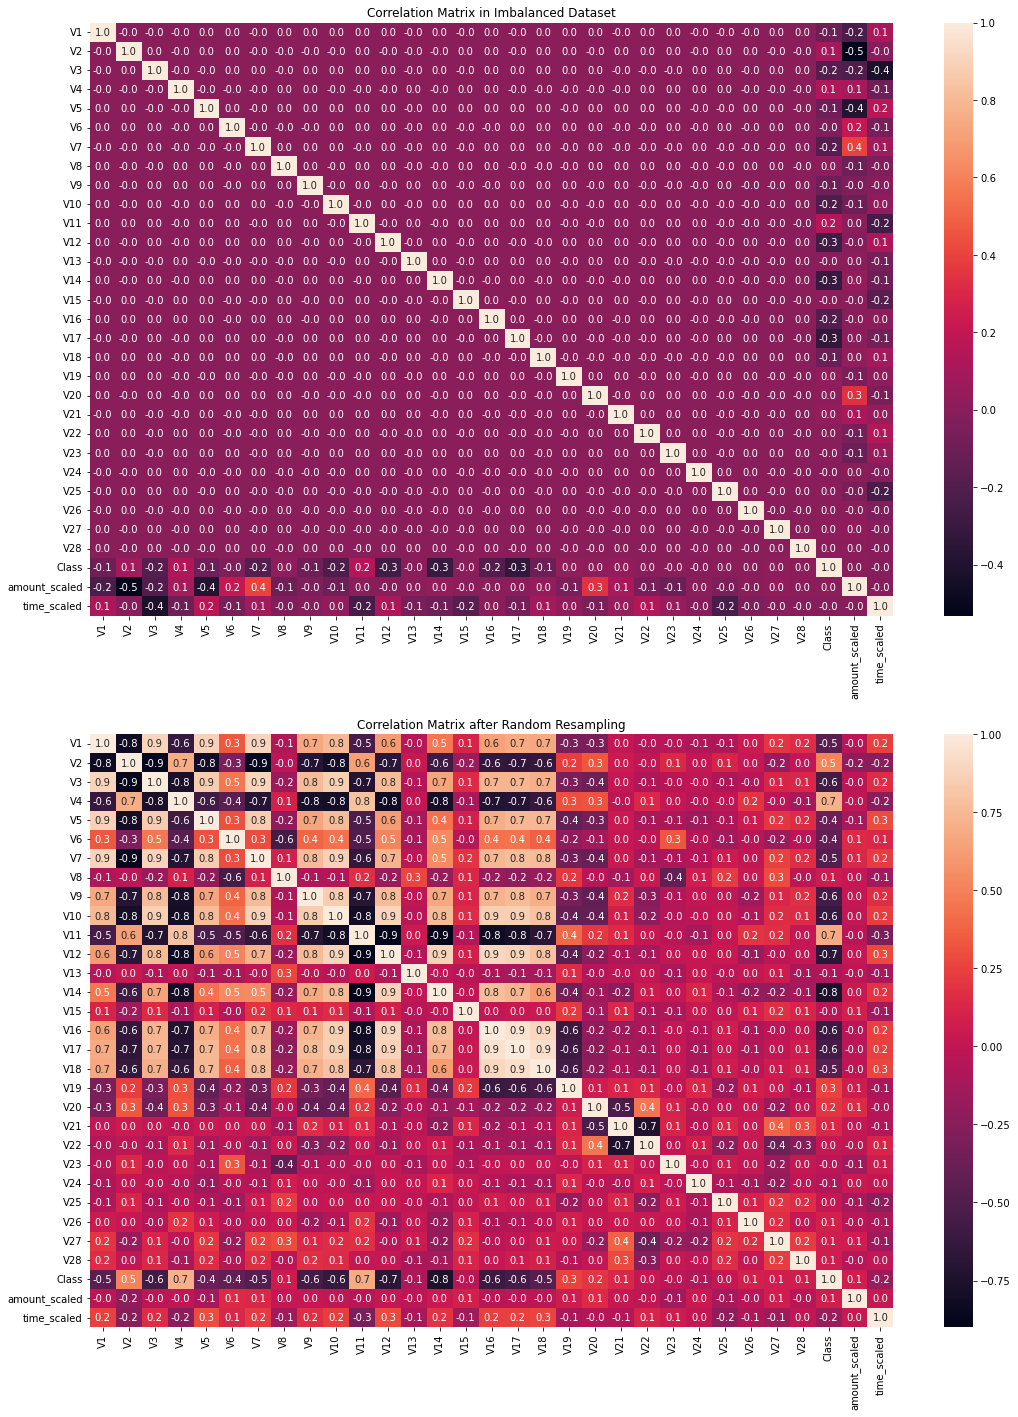

In [33]:
fig, ax = plt.subplots(2,1,figsize=(18,24))

sns.heatmap(df.corr(), annot=True, fmt='0.1f', ax=ax[0])
ax[0].set_title('Correlation Matrix in Imbalanced Dataset', fontsize=18)

sns.heatmap(new_df.corr(), annot=True, fmt='0.1f', ax=ax[1])
ax[1].set_title('Correlation Matrix after Random Resampling', fontsize=18)

**Conclusion:**

- Negative correlations with Class : V1,V3,V7,V9,V10,V12,V14,V16,V17,V18 
- Positice correlations with Class : V2,V4,V11

### Outlier Detection

In [50]:
# Define Function for removing outliers
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

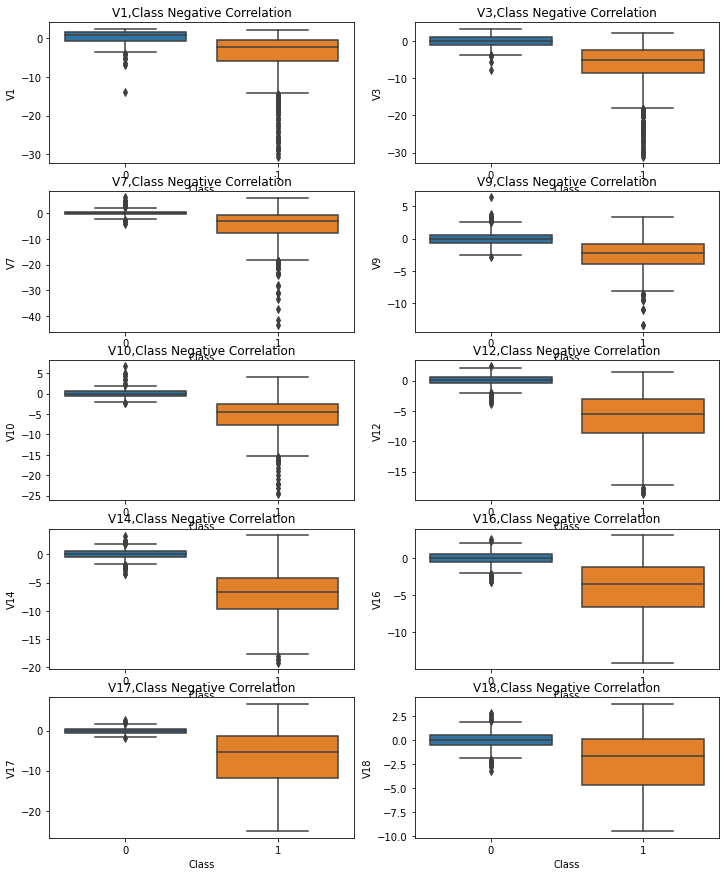

In [46]:
# Boxplot for negative correlation columns before removing outliers
plt.figure(figsize=(12,15))
neg_corr = ['V1', 'V3','V7','V9','V10','V12','V14','V16','V17','V18']

for idx, col in enumerate(neg_corr):
    plt.subplot(5,2,idx+1)
    sns.boxplot(data=new_df, x='Class', y=col)
    plt.title('{},Class Negative Correlation'.format(col))

In [51]:
# Remove outliers for negative correlation columns
for col in neg_corr:
    drop_outliers(new_df,col)

After Removing Outliers


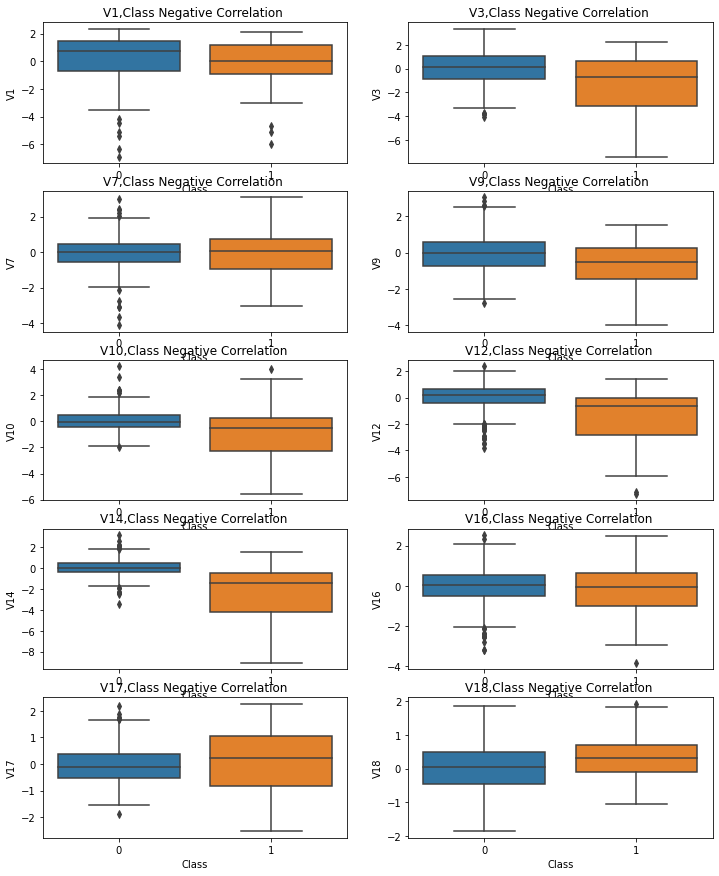

In [52]:
# Boxplot for negative correlation columns after removing outliers
print('After Removing Outliers')
plt.figure(figsize=(12,15))
neg_corr = ['V1', 'V3','V7','V9','V10','V12','V14','V16','V17','V18']

for idx, col in enumerate(neg_corr):
    plt.subplot(5,2,idx+1)
    sns.boxplot(data=new_df, x='Class', y=col)
    plt.title('{},Class Negative Correlation '.format(col))

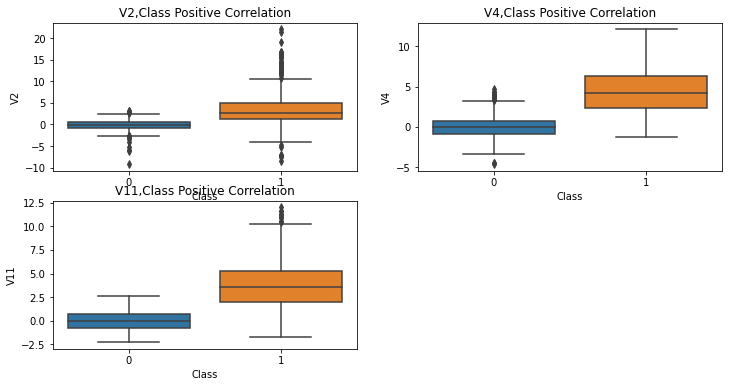

In [49]:
# Box plot for positive correlation columns before removing outliers
plt.figure(figsize=(12,6))
pos_corr = ['V2','V4','V11']

for idx, col in enumerate(pos_corr):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=new_df, x='Class',y=col)
    plt.title('{},Class Positive Correlation'.format(col))

In [53]:
# Remove outliers 
for col in pos_corr:
    drop_outliers(new_df,col)

After Removing Outliers


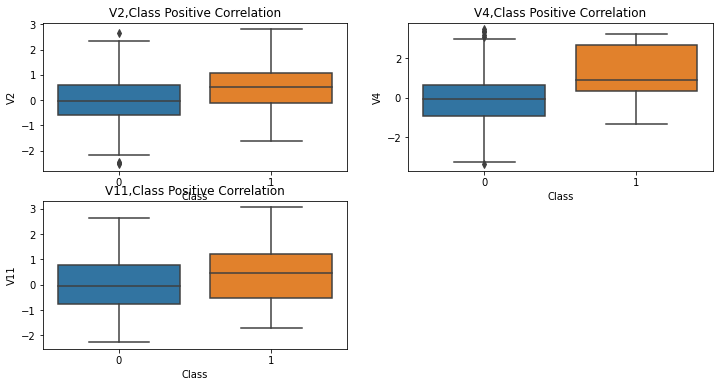

In [54]:
# Boxplot after removing outliers
print('After Removing Outliers')

plt.figure(figsize=(12,6))
pos_corr = ['V2','V4','V11']

for idx, col in enumerate(pos_corr):
    plt.subplot(2,2,idx+1)
    sns.boxplot(data=new_df, x='Class',y=col)
    plt.title('{},Class Positive Correlation'.format(col))

### Feature Engineering

### Train and Test the Model

In [55]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define classifiers to use
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [59]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 90.0 % accuracy score
Classifiers:  SVC Has a training score of 89.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 84.0 % accuracy score
